# Natural Language Processing

By Rodrigo Guarneros

In [35]:
# Dependencias: 
import io
import os
import pandas as pd
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import unicodedata
import math

### 1. Obteniendo la información

In [2]:

# Lista de archivos
list_of_names = ['text_1','text_2', 'text_3', 'text_4','text_5']
 
# lista vacía
dataframes_lista = []
 
# condicional para obtener la lista con todos los elementos
for i in range(len(list_of_names)):
    temp_df = io.open("./textos/"+list_of_names[i]+".txt", encoding="UTF-8").readlines()
    dataframes_lista.append(''.join(temp_df)) # join para tener un texto integrado y evitar una lista de listas.


### 2. Eliminando los acentos en los cinco textos

In [6]:
# considerar todos los símbolos y convertir el texto a minúsculas
# Acentos
# Creamos la función para remover acentos, tal y como se presenta en la clase MCDI-PI-02.

def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

textos_totales = len(dataframes_lista)
dataframe_lista_acentos = [remove_accents(dataframes_lista[i]) for i in range(textos_totales)]
dataframe_lista_acentos[1][:100] # Tomamos el segundo texto para confirmar eliminación de acentos.

'El hereje rebelde\nEn el verde cesped del eden, celebre sede de creyentes, el decente Efren se estrem'

### 3. Normalicemos las mayúsculas

In [16]:
dataframe_lista_acentos_minusc = [dataframe_lista_acentos[i].lower() for i in range(textos_totales)]
dataframe_lista_acentos_minusc[1][:100]

'el hereje rebelde\nen el verde cesped del eden, celebre sede de creyentes, el decente efren se estrem'

### 4. Búsqueda de símbolos y eliminación

In [10]:

# Contemos cada carácter de cada texto en nuestra lista maestra para verificar qué símbolos tenemos.

dataframe_lista_acentos_dic = [Counter(dataframe_lista_acentos_minusc[i]) for i in range(textos_totales)]

texto_1_simb = pd.DataFrame.from_dict(dataframe_lista_acentos_dic[0], orient='index')
texto_2_simb = pd.DataFrame.from_dict(dataframe_lista_acentos_dic[1], orient='index')
texto_3_simb = pd.DataFrame.from_dict(dataframe_lista_acentos_dic[2], orient='index')
texto_4_simb = pd.DataFrame.from_dict(dataframe_lista_acentos_dic[3], orient='index')
texto_5_simb = pd.DataFrame.from_dict(dataframe_lista_acentos_dic[4], orient='index')

#concatenemos para tener una sola vista de todos los simbolos y dónde se encuentran.

df_numero_caracteres = pd.concat([texto_1_simb,texto_2_simb, texto_3_simb, texto_4_simb, texto_5_simb ], axis=1)

# veamos toda la tabla y revisemos qué tenemos:

pd.set_option('display.max_rows',df_numero_caracteres.shape[0]+1)

df_numero_caracteres.columns = ['Texto_1','Texto_2','Texto_3','Texto_4','Texto_5']

# sólo para mejorar la visualización usamos un seaborn heatmap:

df_numero_caracteres.style.format('{:,}').background_gradient(cmap ='viridis')\
        .set_properties(**{'font-size': '20px'})

,Texto_1,Texto_2,Texto_3,Texto_4,Texto_5
c,153.0,93.0,72.0,201.0,61.0
a,"1,863.0",nan,nan,nan,1.0
n,202.0,246.0,137.0,190.0,81.0
t,155.0,185.0,34.0,136.0,74.0
,920.0,658.0,339.0,653.0,297.0
s,296.0,247.0,172.0,324.0,120.0
,4.0,17.0,27.0,15.0,14.0
b,180.0,53.0,21.0,32.0,31.0
r,338.0,284.0,56.0,247.0,100.0
h,74.0,28.0,34.0,38.0,17.0


In [11]:
# En términos absolutos cuál es el texto más grande en términos de carácteres:

Totales_car = [df_numero_caracteres[f'Texto_{i}'].sum() for i in range(1,6)]

Totales_car

[5538.0, 4204.0, 2118.0, 3876.0, 1762.0]

In [12]:
# Como se puede ver, los carácteres que dan menos información y generan ruido en el análisis son:

# paréntesis
# apostrofe
# signos de interrogación
# coma
# dos puntos 
# punto y coma
# espacios en blanco


# Para su eliminación se consideró lo siguiente
# En pandas se eliminan aquellos símbolos que precisamente se consideran con poca información por la frecuencia con la que aparecen en todos los textos.
# No es el caso de aquellos carácteres que NO aparecen en todos los textos:
    
# Index(['c', 'a', 'n', 't', ' ', 's', '\n', 'b', 'r', 'h', 'm', 'd', 'l', ':',
#        'p', 'z', ',', ';', 'v', 'g', '.', '«', 'y', '—', '»', 'j', 'f', '¿',
#        '?', '¡', '!', '’', 'e', 'x', 'k', 'i', '(', ')', 'o', 'u', 'q'],
#       dtype='object')

df_numero_caracteres.drop([' ','\n', '.', '«', '—', '»', '¿', '?', '’', '(', ')', ',', ';',':', '!', '¡'], axis=0, inplace=True) # se eliminan 15 símbolos de puntuación en el df.

# El resultado es
df_numero_caracteres_sim = df_numero_caracteres.style.format('{:,}').background_gradient(cmap ='viridis')\
        .set_properties(**{'font-size': '20px'})

df_numero_caracteres_sim

,Texto_1,Texto_2,Texto_3,Texto_4,Texto_5
c,153.0,93.0,72.0,201.0,61.0
a,"1,863.0",nan,nan,nan,1.0
n,202.0,246.0,137.0,190.0,81.0
t,155.0,185.0,34.0,136.0,74.0
s,296.0,247.0,172.0,324.0,120.0
b,180.0,53.0,21.0,32.0,31.0
r,338.0,284.0,56.0,247.0,100.0
h,74.0,28.0,34.0,38.0,17.0
m,158.0,79.0,69.0,100.0,45.0
d,97.0,189.0,23.0,76.0,49.0


**A primera vista y sin haber realizado el análisis exploratorio de esta información se observa una alta cantidad de letras vocales en un patron interesante y equivalente a 1/3 de cada texto para una sola vocal en el orden que se presenta a continuación:**

In [13]:
# print(f'El Texto 1 tiene {df_numero_caracteres['Texto_1'].max()} que equivalen a {df_numero_caracteres[Texto_1].max()/Totales_car[0]}%')

print(f"El Texto 1 tiene {df_numero_caracteres['Texto_1'].max()} letras 'a', que equivalen a {round((df_numero_caracteres['Texto_1'].max()/Totales_car[0])*100,2)}%")
print(f"El Texto 2 tiene {df_numero_caracteres['Texto_2'].max()} letras 'e', que equivalen a {round((df_numero_caracteres['Texto_2'].max()/Totales_car[1])*100,2)}%")
print(f"El Texto 3 tiene {df_numero_caracteres['Texto_3'].max()} letras 'i', que equivalen a {round((df_numero_caracteres['Texto_3'].max()/Totales_car[2])*100,2)}%")
print(f"El Texto 4 tiene {df_numero_caracteres['Texto_4'].max()} letras '0', que equivalen a {round((df_numero_caracteres['Texto_4'].max()/Totales_car[3])*100,2)}%")
print(f"El Texto 5 tiene {df_numero_caracteres['Texto_5'].max()} letras 'u', que equivalen a {round((df_numero_caracteres['Texto_5'].max()/Totales_car[4])*100,2)}%")


El Texto 1 tiene 1863.0 letras 'a', que equivalen a 33.64%
El Texto 2 tiene 1360.0 letras 'e', que equivalen a 32.35%
El Texto 3 tiene 485.0 letras 'i', que equivalen a 22.9%
El Texto 4 tiene 1179.0 letras '0', que equivalen a 30.42%
El Texto 5 tiene 555.0 letras 'u', que equivalen a 31.5%


### 5. Procedamos al cálculo de la entropía global a nivel de carácter para cada texto.

Dada la definición de entropía: 

$$
{H(X)} = - \sum_{x \in X} p(x)*log_2 *{{p(x)}} 
$$

In [29]:
# Sólo un paso intermedio de preprosesamiento de la lista de textos para respetar su estructura de string, usamos la última lista de listas con los textos normalizados en mayúsculas y acentos: dataframe_lista_acentos_minusc.

simbolos_a_remover = ['','\n', '.', '«', '—', '»', '¿', '?', '’', '(', ')', ',', ';',':', '!', '¡', ' ']

textos_normalizados_completamente = [[s.translate(str.maketrans('', '',''.join(simbolos_a_remover))) for s in string_list] for string_list in dataframe_lista_acentos_minusc]

print(textos_normalizados_completamente[1][:30])


['e', 'l', '', 'h', 'e', 'r', 'e', 'j', 'e', '', 'r', 'e', 'b', 'e', 'l', 'd', 'e', '', 'e', 'n', '', 'e', 'l', '', 'v', 'e', 'r', 'd', 'e', '']


In [37]:
# Creamos la función de entropia para una lista de strings

def entropia(texto):
    if not texto: 
        return 0

    entropia = 0
    for letra in set(texto):
        p = float(texto.count(letra)) / len(texto)
        entropia += p * math.log(p, 2)

    return -entropia

In [38]:
entropia_por_texto = [entropia(textos_normalizados_completamente[i]) for i in range(textos_totales)]
entropia_por_texto

[3.1054139510277285,
 3.115875797466937,
 2.992720599686285,
 3.142825344384568,
 3.191456554531021]

<span style="color:Blue; font-size: 30px;">2. Calcular la entropía global a nivel de palabra de los documentos libro_1 y libro_2  de manera independiente.</span>

## 1. Calcular las frecuencias a nivel de palabras de los siguientes documentos.

* Libro 1
* Libro 2

In [39]:
# Obtener la información de los textos y crear un objeto para cada uno de ellos:

# Lista de archivos
list_of_names = ['libro_1','libro_2']
 
# lista vacía
dataframes_lista = []
 
# condicional para obtener la lista con todos los elementos
for i in range(len(list_of_names)):
    temp_df = io.open("./libros/"+list_of_names[i]+".txt", encoding="UTF-8").readlines()
    dataframes_lista.append(''.join(temp_df)) # join para tener un texto integrado y evitar una lista de listas.
# ¿Qué tipo de información tenemos?

print (f'La información para el libro 1 es:{type(dataframes_lista[0])}, con un número de elementos: {len(dataframes_lista[0])}')
print (f'La información para el libro 2 es:{type(dataframes_lista[1])}, con un número de elementos: {len(dataframes_lista[1])}')

La información para el libro 1 es:<class 'str'>, con un número de elementos: 318464
La información para el libro 2 es:<class 'str'>, con un número de elementos: 293983


In [42]:
# Revisemos cinco elementos de cada lista para familiarizarnos
print(dataframes_lista[0][400:250])
print(dataframes_lista[1][400:450])


ue sobre el césped traza el constante pisar de hom


### 1. Remover acentos

In [50]:

def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

libros_totales = len(dataframes_lista)
dataframe_lista_acentos = [remove_accents(dataframes_lista[i]) for i in range(libros_totales)]
dataframe_lista_acentos[0][3:200] # Tomamos el primer texto para confirmar eliminación de acentos.


'EBLA\n\n\n\n\n  MIGUEL DE UNAMUNO\n\n\n  :: NIEBLA ::\n  (NIVOLA)\n\n  PROLOGO DE\n  VICTOR GOTI\n\n  [Ilustracion]\n\n\n  RENACIMIENTO\n\n  MADRID                BUENOS AIRES\n  SAN MARCOS, 42       LIBERTAD, 172\n\n  '

### 2. Convertir los libros a minúsculas

In [51]:
dataframe_lista_acentos_minusc = [dataframe_lista_acentos[i].lower() for i in range(libros_totales)]
dataframe_lista_acentos_minusc[0][3:200]

'ebla\n\n\n\n\n  miguel de unamuno\n\n\n  :: niebla ::\n  (nivola)\n\n  prologo de\n  victor goti\n\n  [ilustracion]\n\n\n  renacimiento\n\n  madrid                buenos aires\n  san marcos, 42       libertad, 172\n\n  '

### 3. Remover símbolos de puntuación

In [22]:
dataframe_lista_acentos_minusc_simbol = [dataframe_lista_acentos_minusc[i].translate({ord(i): ' ' for i in "' ','\n', '.', '«', '—', '»', '¿', '?', '’', '(', ')', ',', ';',':', '!', '¡'"}) for i in range (libros_totales)]
dataframe_lista_acentos_minusc_simbol[0][3:2000]

'ebla       miguel de unamuno        niebla       nivola     prologo de   victor goti    [ilustracion]     renacimiento    madrid                buenos aires   san marcos  42       libertad  172    1914       es propiedad     imprenta renacimiento  san marcos  42      prologo   se empena don miguel de unamuno en que ponga yo un prologo a este su libro en que se relata la tan lamentable historia de mi buen amigo augusto perez y su misteriosa muerte  y yo no puedo menos sino escribirlo  porque los deseos del senor unamuno son para mi mandatos  en la mas genuina acepcion de este vocablo  sin haber yo llegado al extremo de escepticismo hamletiano de mi pobre amigo perez  que llego hasta a dudar de su propia existencia  estoy por lo menos firmemente persuadido de que carezco de eso que los psicologos llaman libre albedrio  aunque para mi consuelo creo tambien que tampoco goza don miguel de el   parecera acaso extrano a alguno de nuestros lectores que sea yo  un perfecto desconocido en la re

### 4. Procedamos al cálculo de la entropía global a nivel de palabra para cada libro.

Dada la definición de entropía: 

$$
{H(X)} = - \sum_{x \in X} p(x)*log_2 *{{p(x)}} 
$$

In [55]:
dataframe_lista_acentos_minusc[1][5]

'a'

## 3. Remover las palabras que no son de contenido, es decir, eliminar todas las palabras denominadas "stopwords" antes de realizar los conteos y nuevamente responder las siguientes preguntas. 

In [23]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rodri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from nltk.corpus import stopwords
es_stopwords = stopwords.words('spanish')
type(es_stopwords) # list
print(es_stopwords)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [26]:
# Vamos a obtener los tokens de cada libro
dataframe_lista_acentos_minusc_simbol_palabras = [dataframe_lista_acentos_minusc_simbol[i].split() for i in range(libros_totales)]

# Ahora eliminemos las stop words en español.

libro1_normalizado = [word for word in dataframe_lista_acentos_minusc_simbol_palabras[0] if word not in es_stopwords]
libro2_normalizado = [word for word in dataframe_lista_acentos_minusc_simbol_palabras[1] if word not in es_stopwords]



## ¿Cuántas palabras hay en cada texto?

In [27]:
df_libro1_normalizado = pd.DataFrame (libro1_normalizado, columns = ['Libro1'])
df_libro2_normalizado = pd.DataFrame (libro2_normalizado, columns = ['Libro2'])

print(f'El número de palabras en el libro 1 son {len(df_libro1_normalizado)} después de normalizar')
print(f'El número de palabras en el libro 2 son {len(df_libro2_normalizado)} después de normalizar')

El número de palabras en el libro 1 son 27501 después de normalizar
El número de palabras en el libro 2 son 26444 después de normalizar


## ¿Cuántas palabras diferentes (palabras únicas) hay en el texto?

In [28]:
c_libro1_normalizado = Counter(libro1_normalizado)
c_libro2_normalizado = Counter(libro2_normalizado)

print(f'Usando un counter para el libro 1 dividido por token, se tiene que las palabras únicas totales son {len(c_libro1_normalizado.keys())}, lo que equivale a {round(len(c_libro1_normalizado.keys())/len(df_libro1_normalizado),2)*100}% del total de palabras')
print(f'Usando un counter para el libro 2 dividido por token, se tiene que las palabras únicas totales son {len(c_libro2_normalizado.keys())}, lo que equivale a {round(len(c_libro2_normalizado.keys())/len(df_libro1_normalizado),2)*100}% del total de palabras')


Usando un counter para el libro 1 dividido por token, se tiene que las palabras únicas totales son 7277, lo que equivale a 26.0% del total de palabras
Usando un counter para el libro 2 dividido por token, se tiene que las palabras únicas totales son 8535, lo que equivale a 31.0% del total de palabras


## ¿Cuáles son las palabras con frecuencia 1 (hapax legomena) en el texto? Mostrar las primeras 100 palabras si es que las hay.

In [29]:
def my_filtering_function(pair):
    key, value = pair
    if value == 1:
        return True  # keep pair in the filtered dictionary
    else:
        return False  # filter pair out of the dictionary
  
filtered_values_libro1 = dict(filter(my_filtering_function, c_libro1_normalizado.items()))
filtered_values_libro2 = dict(filter(my_filtering_function, c_libro2_normalizado.items()))
 
print(f'Se trata de {len(filtered_values_libro1)} palabras hapax legomena para el libro 1')
print(f'Se trata de {len(filtered_values_libro2)} palabras hapax legomena para el libro 2')
 
print(f'Las primeras 100 palabras con frecuencia absoluta igual a 1 en el ibro 1 son: \n {list(filtered_values_libro1.keys())[:100],}')
print(f'Las primeras 100 palabras con frecuencia absoluta igual a 1 en el ibro 2 son: \n {list(filtered_values_libro2.keys())[:100],}')

Se trata de 4330 palabras hapax legomena para el libro 1
Se trata de 5338 palabras hapax legomena para el libro 2
Las primeras 100 palabras con frecuencia absoluta igual a 1 en el ibro 1 son: 
 (['\ufeffniebla', '[ilustracion]', 'madrid', '172', '1914', 'imprenta', 'relata', 'escribirlo', 'mandatos', 'genuina', 'acepcion', 'vocablo', 'escepticismo', 'hamletiano', 'firmemente', 'persuadido', 'psicologos', 'parecera', 'republica', 'prologue', 'ventajosamente', 'conocidos', 'prologos', 'alterar', 'perniciosa', 'terminos', 'compran', 'principiante', 'desee', 'veterano', 'permita', 'ponerselo', 'resolver', 'pleito', 'unenme', 'lazos', 'relucir', 'vease', 'pag', '158', 'dichos', 'narra', 'victorcito', 'antepasados', 'doctisimas', 'investigaciones', 'genealogicas', 'erudicion', 'prever', 'acojida', 'obtendra', 'tomaran', 'entablado', 'asombrado', 'candida', '_mundo', 'grafico_', 'publicacion', 'recortes', 'provincias', 'manifiesto', 'tesoros', 'candidez', 'palomina', 'conservan', 'comentan', 

## ¿Cuáles son las palabras más frecuentes (mayor frecuencia)? Mostrar las primeras 100 palabras si es que las hay, en qué difieren en los textos

In [30]:
import operator

palabras_ordenadas_libro1 = sorted(c_libro1_normalizado.items(), key=operator.itemgetter(1), reverse=True)

print('Las palabras más frecuentes en el Libro 1 son:')

for word in enumerate(palabras_ordenadas_libro1):
    if c_libro1_normalizado[word[1][0]] > 60:
        print(f"'{word[1][0]}', tiene una frecuencia de, {c_libro1_normalizado[word[1][0]]}")



Las palabras más frecuentes en el Libro 1 son:
'si', tiene una frecuencia de, 637
'mas', tiene una frecuencia de, 412
'usted', tiene una frecuencia de, 376
'augusto', tiene una frecuencia de, 372
'eugenia', tiene una frecuencia de, 231
'pues', tiene una frecuencia de, 215
'don', tiene una frecuencia de, 206
'mujer', tiene una frecuencia de, 187
'asi', tiene una frecuencia de, 167
'hombre', tiene una frecuencia de, 150
'bien', tiene una frecuencia de, 138
'dijo', tiene una frecuencia de, 136
'ahora', tiene una frecuencia de, 136
'casa', tiene una frecuencia de, 130
'sino', tiene una frecuencia de, 119
'ser', tiene una frecuencia de, 107
'mismo', tiene una frecuencia de, 106
'vez', tiene una frecuencia de, 97
'pobre', tiene una frecuencia de, 92
'habia', tiene una frecuencia de, 90
'vida', tiene una frecuencia de, 89
'ojos', tiene una frecuencia de, 88
'luego', tiene una frecuencia de, 79
'cosas', tiene una frecuencia de, 79
'hacer', tiene una frecuencia de, 77
'decir', tiene una frecuen

In [31]:
palabras_ordenadas_libro2 = sorted(c_libro2_normalizado.items(), key=operator.itemgetter(1), reverse=True)

print('Las palabras más frecuentes en el Libro 2 son:')

for word in enumerate(palabras_ordenadas_libro2):
    if c_libro2_normalizado[word[1][0]] > 60:
        print(f"'{word[1][0]}', tiene una frecuencia de, {c_libro2_normalizado[word[1][0]]}")



Las palabras más frecuentes en el Libro 2 son:
'mas', tiene una frecuencia de, 326
'nela', tiene una frecuencia de, 312
'si', tiene una frecuencia de, 251
'--', tiene una frecuencia de, 242
'habia', tiene una frecuencia de, 140
'despues', tiene una frecuencia de, 125
'ojos', tiene una frecuencia de, 109
'dios', tiene una frecuencia de, 108
'florentina', tiene una frecuencia de, 107
'usted', tiene una frecuencia de, 103
'teodoro', tiene una frecuencia de, 100
'tan', tiene una frecuencia de, 99
'golfin', tiene una frecuencia de, 91
'casa', tiene una frecuencia de, 91
'ser', tiene una frecuencia de, 85
'aqui', tiene una frecuencia de, 81
'--no', tiene una frecuencia de, 79
'bien', tiene una frecuencia de, 76
'senor', tiene una frecuencia de, 73
'cosas', tiene una frecuencia de, 73
'ver', tiene una frecuencia de, 73
'd', tiene una frecuencia de, 73
'parece', tiene una frecuencia de, 72
'dos', tiene una frecuencia de, 70
'todas', tiene una frecuencia de, 69
'tambien', tiene una frecuencia d

## Generar los histogramas de todos los documentos.  Para generar los histogramas ordenar las palabras de acuerdo a la frecuencia de mayor a menor. Si el número de datos es excesivo y difícil de visualizar, presente los datos que considere para que se aprecien adecuadamente los datos graficados.

In [32]:
df_c_libro1_normalizado = pd.DataFrame.from_dict(c_libro1_normalizado, orient='index')
df_c_libro2_normalizado = pd.DataFrame.from_dict(c_libro2_normalizado, orient='index')
df_c_libro1_normalizado = df_c_libro1_normalizado.sort_values(by=0, ascending=False)
df_c_libro2_normalizado = df_c_libro2_normalizado.sort_values(by=0, ascending=False)


In [33]:
%matplotlib inline
df_c_libro1_normalizado = df_c_libro1_normalizado.reset_index()
df_c_libro2_normalizado = df_c_libro2_normalizado.reset_index()



In [34]:
df_c_libro2_normalizado.columns = ['palabras', 'frecuencia']
df_c_libro1_normalizado.columns = ['palabras', 'frecuencia']


Text(0.5, 1.0, 'Frecuencia absoluta de las palabras del libro 1')

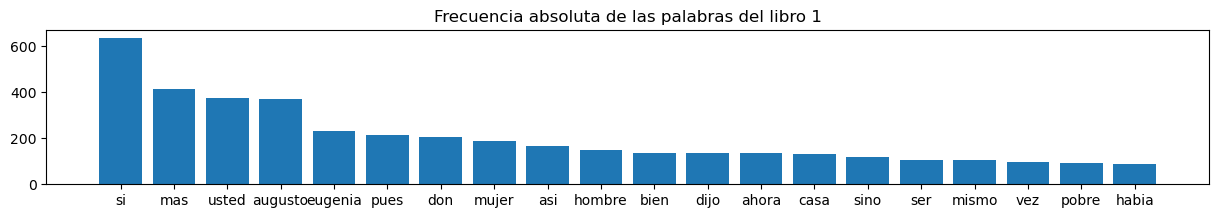

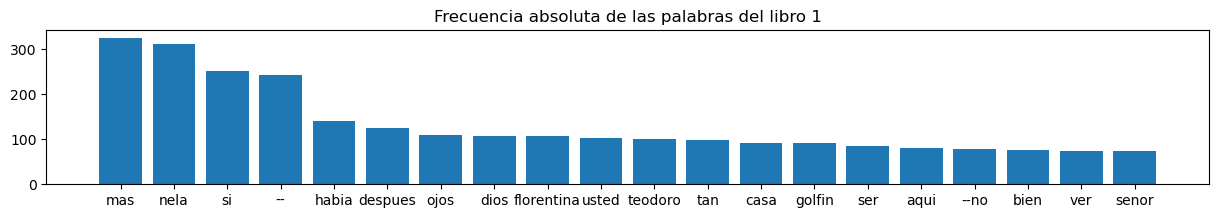

In [35]:
df_c_graph1 = df_c_libro1_normalizado.iloc[:20]
df_c_graph2 = df_c_libro2_normalizado.iloc[:20]



# Libro1

plt.figure(figsize=(15, 2))
plt.bar(df_c_graph1['palabras'], df_c_graph1['frecuencia'])
plt.title("Frecuencia absoluta de las palabras del libro 1")

plt.figure(figsize=(15, 2))
plt.bar(df_c_graph2['palabras'], df_c_graph2['frecuencia'])
plt.title("Frecuencia absoluta de las palabras del libro 1")



### Bibliografía y referencias electrónicas

- Clase MCDI PI-02 Revisión de Estructuras de Datos en Python, Dr. José Luis Jimenez Márquez. Disponible en: https://youtu.be/vXZ7WUA0dko
- Text Normalization for Natural Language Processing in Python. Disponible en: https://lvngd.com/blog/text-normalization-natural-language-processing-python/
- Display the Pandas DataFrame in Heatmap Style. Disponible en:https://www.geeksforgeeks.org/display-the-pandas-dataframe-in-heatmap-style/
- Para el código del filtrado del diccionario en la pregunta 2.3 se utiliza el código disponible aquí: https://learnpython.com/blog/filter-dictionary-in-python/ 